<a href="https://colab.research.google.com/github/adheeb4/MLNN-Project-Group-40/blob/main/Group_Project_Group_40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import os
import numpy as np
from PIL import Image
from google.colab import drive
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras import layers, models, optimizers, losses, callbacks,\
                             regularizers
from keras.activations import relu, sigmoid
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
train_directory = "/content/gdrive/MyDrive/Group_Project_Data 2/Group_Project_Data/Train"
validation_directory = "/content/gdrive/MyDrive/Group_Project_Data 2/Group_Project_Data/Valid"


In [15]:
train_data_gen = ImageDataGenerator(rescale = 1./255, shear_range =0.2, zoom_range = 0.2, horizontal_flip = True)
val_data_gen = ImageDataGenerator(rescale = 1./255)

In [16]:
train_gen = train_data_gen.flow_from_directory(
    train_directory,
    target_size = (64, 64),
    batch_size = 64,
    class_mode = "binary",
    color_mode = "grayscale",
    classes =["Real", "Fake"],
    shuffle=True,
    seed=42,
    subset = "training"
)

Found 6000 images belonging to 2 classes.


In [17]:
val_gen = val_data_gen.flow_from_directory(
    validation_directory,
    target_size = (64, 64),
    batch_size = 64,
    class_mode = "binary",
    color_mode = "grayscale",
    classes =["Real", "Fake"],
    shuffle=False,
    seed=42,
)

Found 2000 images belonging to 2 classes.


In [18]:
input_layer = Input((64, 64, 1), name="Input")

conv_1 = Conv2D(32, (3, 3), activation=relu, padding="same", name="conv_1")(input_layer)
conv_2 = Conv2D(32, (3, 3), activation=relu, padding="same", name="conv_2")(conv_1)
pool_1 = MaxPooling2D(pool_size=(2, 2),name="pool_1")(conv_2)
dropout1 = Dropout(0.2, name="dropout_1")(pool_1)

conv_3 = Conv2D(64, (3, 3), activation=relu, padding="same", name="conv_3")(dropout1)
conv_4 = Conv2D(64, (3, 3), activation=relu, padding="same", name="conv_4")(conv_3)
pool_2 = MaxPooling2D(pool_size=(2, 2),name="pool_2")(conv_4)
dropout_2 = Dropout(0.3, name="dropout_2")(pool_2)

conv_5 = Conv2D(128, (3, 3), activation=relu, padding="same", name="conv_5")(dropout_2)
conv_6 = Conv2D(128, (3, 3), activation=relu, padding="same", name="conv_6")(conv_5)
pool_3 = MaxPooling2D(pool_size=(2, 2),name="pool_3")(conv_6)
dropout_3 = Dropout(0.4, name="dropout_3")(pool_2)

flat = Flatten(name="flat")(pool_3)
fc_1 = Dense(units=512, activation=relu, name="fc_1")(flat)
dropout_4 = Dropout(0.5, name="dropout_4")(fc_1)

Output = Dense(units=1, activation=sigmoid, name="Output")(fc_1)

model = Model(inputs=input_layer, outputs=Output, name="Galaxies")
model.summary()

Model: "Galaxies"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 64, 64, 1)]       0         
                                                                 
 conv_1 (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 conv_2 (Conv2D)             (None, 64, 64, 32)        9248      
                                                                 
 pool_1 (MaxPooling2D)       (None, 32, 32, 32)        0         
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv_3 (Conv2D)             (None, 32, 32, 64)        18496     
                                                                 
 conv_4 (Conv2D)             (None, 32, 32, 64)        369

In [21]:
model.compile(optimizer=optimizers.SGD(), loss=losses.BinaryCrossentropy(), metrics=["accuracy"])

In [22]:
Early_Stop = callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(train_gen,
                    steps_per_epoch=train_gen.samples // train_gen.batch_size,
                    epochs=50,
                    validation_data=val_gen,
                    validation_steps=val_gen.samples // val_gen.batch_size, callbacks=[Early_Stop])



Epoch 1/50
93/93 [==============================] - 2070s 22s/step - loss: 0.6968 - accuracy: 0.5034 - val_loss: 0.6938 - val_accuracy: 0.4960
Epoch 2/50
93/93 [==============================] - 18s 191ms/step - loss: 0.6934 - accuracy: 0.5084 - val_loss: 0.6956 - val_accuracy: 0.4960
Epoch 3/50
93/93 [==============================] - 18s 190ms/step - loss: 0.6940 - accuracy: 0.4923 - val_loss: 0.6933 - val_accuracy: 0.4960
Epoch 4/50
93/93 [==============================] - 17s 186ms/step - loss: 0.6929 - accuracy: 0.5103 - val_loss: 0.6933 - val_accuracy: 0.4960
Epoch 5/50
93/93 [==============================] - 37s 398ms/step - loss: 0.6934 - accuracy: 0.5180 - val_loss: 0.6946 - val_accuracy: 0.4960
Epoch 6/50
93/93 [==============================] - 15s 165ms/step - loss: 0.6935 - accuracy: 0.5007 - val_loss: 0.6954 - val_accuracy: 0.4960


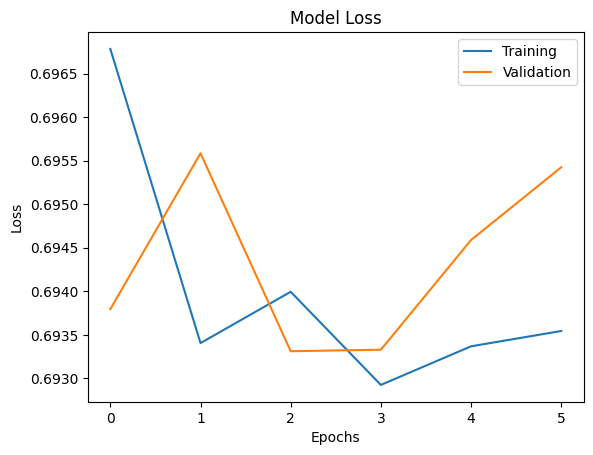

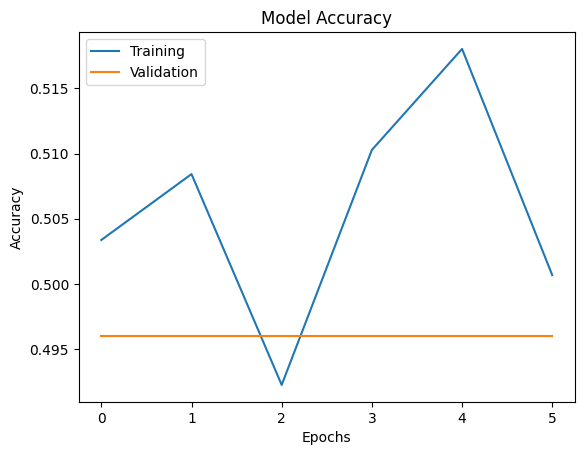

In [24]:
plt.figure()

plt.plot(history.history["loss"], label="Training")
plt.plot(history.history["val_loss"], label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc=0)
plt.title("Model Loss")
plt.show()

plt.figure()
plt.plot(history.history["accuracy"], label="Training")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc=0)
plt.title("Model Accuracy")


plt.show()


In [ ]:
y_pred = model.predict(x_test)
y_pred_label = np.argmax(y_pred, axis=1)

f, ax = plt.subplots(5,5, figsize=(15, 17))
ax = ax.flatten()

for i in range(25):
    ax[i].imshow(x_test[i,:,:,0])
    ax[i].set_title(f'Truth = {class_names[y_test[i][0]]}\nPrediction = {class_names[y_pred_label[i]]}')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()